In [2]:
# importing require libraries
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("/Users/darshgupta/Desktop/Winter Sem/IOT Domain Analyst/LAB/Task 3/HR_comma_sep.csv") 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
left = df[df.left==1]
left.shape

(3571, 10)

In [5]:
retained = df[df.left==0]
retained.shape
k= df.groupby('left').mean()
k

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


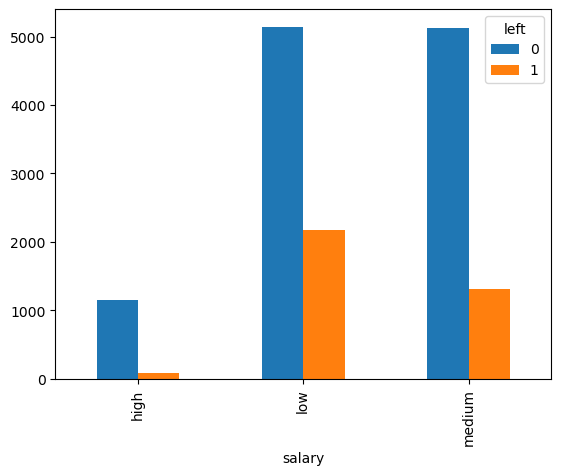

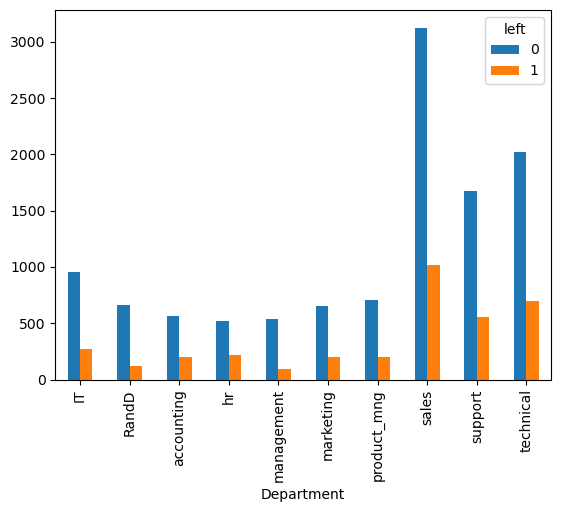

In [6]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
pd.crosstab(df.Department,df.left).plot(kind='bar')
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

In [7]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary") ##Spliting one column to three using dummy
salary_dummies
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [8]:
y = df.left
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted=model.predict(X_test)
X_test
y_test
model.score(X_test,y_test)

0.7786666666666666

Text(0.5, 47.7222222222222, 'True')

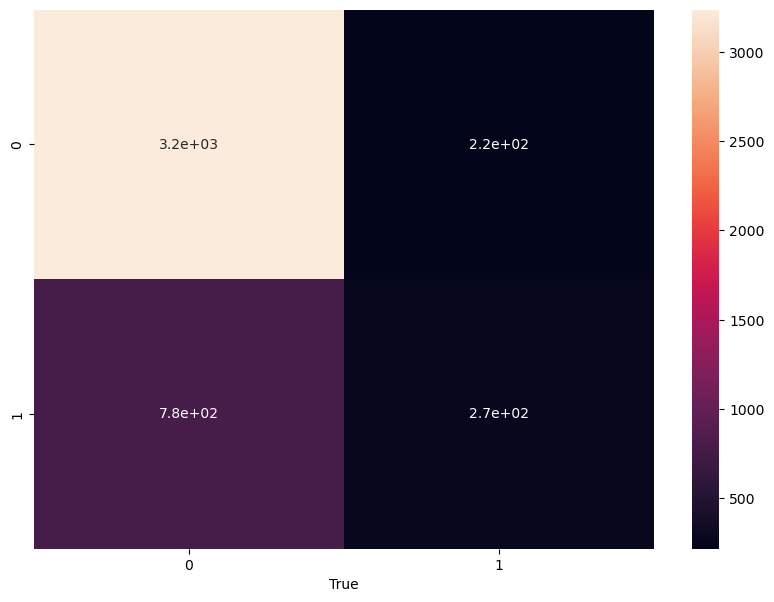

In [9]:
#---------Confusion Matrix------
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.xlabel('True')